# Educação Infantil - Evolução Demanda e Vagas

Este tutorial analisa a evolução histórica de demanda por vagas na Educação Infantil.

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# mapas
import geojson
import jenkspy

### Importar dados

In [9]:
censo_df = pd.read_csv('dados/evolucao_demanda/evolucaodemanda_0318.csv',
                       encoding='latin-1', sep=';')

In [10]:
censo_df.columns

Index(['DISTRITO', 'MAT_CRECHE', 'MAT_PRE_ESCOLA', 'MAT_FUND_I', 'MAT_FUND_II',
       'MAT_EJA_I', 'MAT_EJA_II', 'MAT_ENS_MED', 'MAT_ED_PROF',
       'MAT_PROC_CRECHE', 'MAT_PROC_PRE_ESC', 'DEM_CRECHE', 'DEM_PRE',
       'DEM_FUND_I', 'DEM_FUND_II', 'DEM_EJA_I', 'DEM_EJA_II',
       'DEM_PREF_CRECHE', 'DEM_PREF_PRE', 'MES_ANO_REF'],
      dtype='object')

### Substituir abreviação dos meses por números

In [11]:
censo_df['MES_ANO_REF'] = censo_df['MES_ANO_REF'].replace({ 'jun' : '06', 'dez' : '12', 'mar' : '03', 'set': '09', '-': '/20' }, regex=True)

### Criar coluna para meses

In [12]:
censo_df['month'] = censo_df['MES_ANO_REF'].str.slice(0,2)

### Criar coluna para datas

In [13]:
censo_df['date'] = pd.to_datetime(censo_df['MES_ANO_REF'], format='%m/%Y', errors='coerce')

### Criar colunas para total das matrículas e demanda

É preciso considerar as matrículas em processo e a demanda preferencial.

In [14]:
# substituindo NaN por zeros
censo_df = censo_df.fillna(value=0)

In [15]:
censo_df['mat_creche_tot'] = censo_df['MAT_CRECHE'] + censo_df['MAT_PROC_CRECHE']
censo_df['mat_pre_tot'] = censo_df['MAT_PRE_ESCOLA'] + censo_df['MAT_PROC_PRE_ESC']
censo_df['dem_creche_tot'] = censo_df['DEM_CRECHE'] + censo_df['DEM_PREF_CRECHE']
censo_df['dem_pre_tot'] = censo_df['DEM_PRE'] + censo_df['DEM_PREF_PRE']

### Filtrar somente mês de dezembro

Uma vez que as estatísticas de demanda da SME são sempre calculadas baseadas em dezembro.

In [16]:
censo_df[censo_df['month'] == '12']

,DISTRITO,MAT_CRECHE,MAT_PRE_ESCOLA,MAT_FUND_I,MAT_FUND_II,MAT_EJA_I,MAT_EJA_II,MAT_ENS_MED,MAT_ED_PROF,MAT_PROC_CRECHE,...,DEM_EJA_II,DEM_PREF_CRECHE,DEM_PREF_PRE,MES_ANO_REF,month,date,mat_creche_tot,mat_pre_tot,dem_creche_tot,dem_pre_tot
192,AGUA RASA,634,1950,1323,1354,100,101,0,0,0.0,...,0.0,0.0,0.0,12/2006,12,2006-12-01,634.0,1950.0,683.0,199.0
193,ALTO DE PINHEIROS,248,198,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,12/2006,12,2006-12-01,248.0,198.0,170.0,3.0
194,ANHANGUERA,247,1974,2944,2549,113,671,0,0,0.0,...,0.0,0.0,0.0,12/2006,12,2006-12-01,247.0,1974.0,424.0,318.0
195,ARICANDUVA,460,1716,2354,2082,157,683,0,0,0.0,...,0.0,0.0,0.0,12/2006,12,2006-12-01,460.0,1716.0,717.0,278.0
196,ARTUR ALVIM,854,4405,3162,2684,125,511,0,0,0.0,...,0.0,0.0,0.0,12/2006,12,2006-12-01,854.0,4405.0,1368.0,329.0
197,BARRA FUNDA,259,347,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,12/2006,12,2006-12-01,259.0,347.0,266.0,50.0
198,BELA VISTA,605,1226,526,497,0,430,0,0,0.0,...,0.0,0.0,0.0,12/2006,12,2006-12-01,605.0,1226.0,808.0,22.0
199,BELEM,201,1540,397,0,0,0,0,0,0.0,...,0.0,0.0,0.0,12/2006,12,2006-12-01,201.0,1540.0,532.0,227.0
200,BOM RETIRO,472,1602,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,12/2006,12,2006-12-01,472.0,1602.0,711.0,497.0
201,BRAS,307,690,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,12/2006,12,2006-12-01,307.0,690.0,617.0,264.0


### Agrupar e somar

Agrupar pela data e somar colunas de matrículas e demanda.

In [17]:
# tamanho dos gráficos
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 4)

Populating the interactive namespace from numpy and matplotlib


In [18]:
evol_ens_inf_df = censo_df[censo_df['month'] == '12'].groupby(['date'])[['mat_creche_tot', 'mat_pre_tot', 'dem_creche_tot', 'dem_pre_tot']].sum()
evol_ens_inf_df

,mat_creche_tot,mat_pre_tot,dem_creche_tot,dem_pre_tot
date,,,,
2006-12-01,64436.0,330601.0,129594.0,64548.0
2007-12-01,83364.0,324512.0,79231.0,75316.0
2008-12-01,109930.0,318173.0,61089.0,16098.0
2009-12-01,123155.0,309334.0,74707.0,22548.0
2010-12-01,135150.0,291944.0,100401.0,19871.0
2011-12-01,201041.0,185582.0,101165.0,8642.0
2012-12-01,214095.0,183262.0,97160.0,2585.0
2013-12-01,214460.0,200371.0,96696.0,9688.0
2014-12-01,228204.0,202297.0,94191.0,5625.0


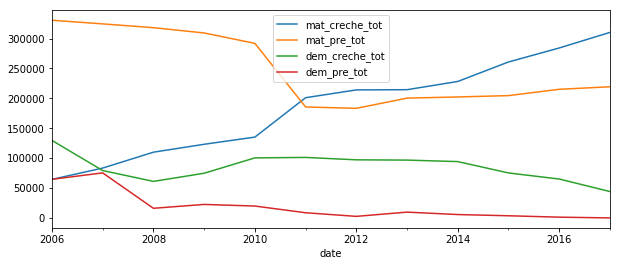

In [19]:
evol_ens_inf_df.plot.line()
plt.show()

### Separando por ciclo de ensino

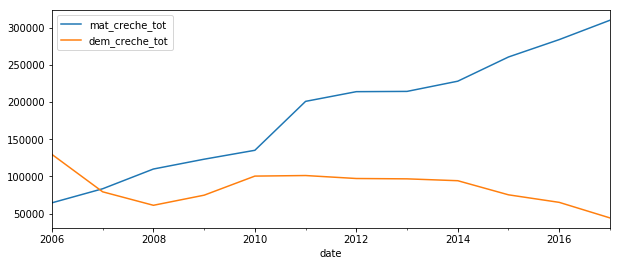

In [20]:
censo_df[censo_df['month'] == '12'].groupby(['date'])[['mat_creche_tot', 'dem_creche_tot']].sum().plot.line()
plt.show()

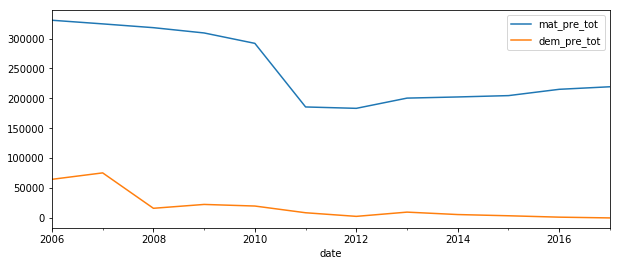

In [21]:
censo_df[censo_df['month'] == '12'].groupby(['date'])[['mat_pre_tot', 'dem_pre_tot']].sum().plot.line()
plt.show()

### Por Distrito

In [22]:
(pd.pivot_table(censo_df[censo_df['month'] == '12'], values='mat_creche_tot', index=['date'],
                     columns=['DISTRITO'], aggfunc=np.sum))

DISTRITO,AGUA RASA,ALTO DE PINHEIROS,ANHANGUERA,ARICANDUVA,ARTUR ALVIM,BARRA FUNDA,BELA VISTA,BELEM,BOM RETIRO,BRAS,...,VILA FORMOSA,VILA GUILHERME,VILA JACUI,VILA LEOPOLDINA,VILA MARIA,VILA MARIANA,VILA MATILDE,VILA MEDEIROS,VILA PRUDENTE,VILA SONIA
date,,,,,,,,,,,,,,,,,,,,,
2006-12-01,634.0,248.0,247.0,460.0,854.0,259.0,605.0,201.0,472.0,307.0,...,257.0,236.0,1145.0,215.0,912.0,296.0,356.0,777.0,832.0,525.0
2007-12-01,723.0,290.0,325.0,552.0,1217.0,237.0,599.0,437.0,511.0,317.0,...,269.0,300.0,1320.0,212.0,1141.0,357.0,684.0,905.0,1043.0,760.0
2008-12-01,770.0,257.0,684.0,715.0,1509.0,341.0,649.0,534.0,504.0,442.0,...,273.0,484.0,1951.0,259.0,1515.0,317.0,903.0,1168.0,1306.0,848.0
2009-12-01,732.0,280.0,817.0,878.0,1551.0,287.0,755.0,635.0,489.0,398.0,...,654.0,410.0,2115.0,268.0,1522.0,346.0,929.0,1578.0,1289.0,839.0
2010-12-01,685.0,259.0,877.0,1003.0,1646.0,284.0,852.0,663.0,505.0,405.0,...,657.0,366.0,2346.0,228.0,1494.0,385.0,910.0,1604.0,1254.0,833.0
2011-12-01,824.0,368.0,1095.0,1306.0,2115.0,375.0,1286.0,920.0,944.0,663.0,...,1208.0,728.0,3125.0,277.0,2037.0,571.0,1126.0,2532.0,1656.0,1501.0
2012-12-01,884.0,383.0,1316.0,1256.0,2232.0,379.0,1461.0,1027.0,807.0,690.0,...,1223.0,972.0,3324.0,266.0,2588.0,656.0,1242.0,2976.0,1716.0,1582.0
2013-12-01,913.0,365.0,1244.0,1219.0,2161.0,383.0,1322.0,1010.0,736.0,689.0,...,1288.0,881.0,3359.0,305.0,2472.0,554.0,1193.0,2902.0,1760.0,1557.0
2014-12-01,918.0,372.0,1711.0,1505.0,2166.0,383.0,1298.0,1031.0,850.0,662.0,...,1309.0,820.0,3499.0,403.0,2546.0,607.0,1483.0,2886.0,1774.0,1621.0


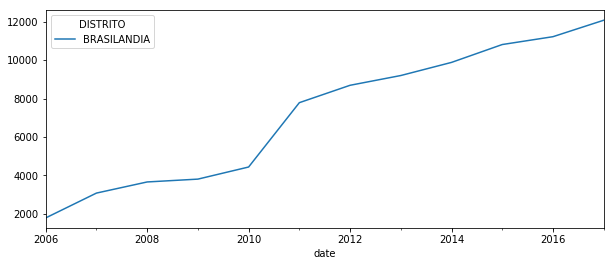

In [23]:
(pd.pivot_table(censo_df[(censo_df['month'] == '12') & (censo_df['DISTRITO'] == 'BRASILANDIA')], values='mat_creche_tot', index=['date'],
                     columns=['DISTRITO'], aggfunc=np.sum)).plot.line()


### Diferença de matrículas de creche desde o começo da série, por distrito

In [24]:
max_date = censo_df[censo_df['month'] == '12']['date'].max()
min_date = censo_df[censo_df['month'] == '12']['date'].min()
min_mat_creche = censo_df[censo_df['date'] == min_date].groupby(['date'])[['mat_creche_tot']].sum()['mat_creche_tot'].iloc[0]
max_mat_creche = censo_df[censo_df['date'] == max_date].groupby(['date'])[['mat_creche_tot']].sum()['mat_creche_tot'].iloc[0]
max_mat_creche - min_mat_creche

245840.0

In [25]:
# diferença absoluta
mat_creche_pivot_dist = (pd.pivot_table(censo_df[censo_df['month'] == '12'], values='mat_creche_tot', index=['date'],
                     columns=['DISTRITO'], aggfunc=np.sum))
mat_creche_pivot_dist = (mat_creche_pivot_dist.iloc[-1].subtract(mat_creche_pivot_dist.iloc[0])
    #.to_csv('mat_creche_pivot_dist.csv', header=True)
)

In [30]:
# diferença percentual
mat_creche_pivot_dist_pct = (pd.pivot_table(censo_df[censo_df['month'] == '12'], values='mat_creche_tot', index=['date'],
                     columns=['DISTRITO'], aggfunc=np.sum))
mat_creche_pivot_dist_pct = (mat_creche_pivot_dist_pct.iloc[-1].div(mat_creche_pivot_dist.iloc[0])
    #.to_csv('mat_creche_pivot_dist_pct.csv', header=True)
)
mat_creche_pivot_dist_pct

DISTRITO
AGUA RASA              2.542579
ALTO DE PINHEIROS      0.982968
ANHANGUERA             6.491484
ARICANDUVA             4.077859
ARTUR ALVIM            6.532847
BARRA FUNDA            0.819951
BELA VISTA             3.671533
BELEM                  2.785888
BOM RETIRO             2.214112
BRAS                   1.243309
BRASILANDIA           29.389294
BUTANTA                2.260341
CACHOEIRINHA          13.192214
CAMBUCI                1.160584
CAMPO BELO             2.637470
CAMPO GRANDE           4.031630
CAMPO LIMPO           18.737226
CANGAIBA              10.586375
CAPAO REDONDO         22.895377
CARRAO                 4.274939
CASA VERDE             3.982968
CIDADE ADEMAR         16.688564
CIDADE DUTRA          17.160584
CIDADE LIDER           9.233577
CIDADE TIRADENTES     27.965937
CONSOLACAO             0.510949
CURSINO                3.306569
ERMELINO MATARAZZO     9.092457
FREGUESIA DO O         8.294404
GRAJAU                33.080292
                        ...    

### Comparando dez 2016 e dez 2017

In [31]:
# diferença absoluta
mat_creche_pivot_dist_diff = (pd.pivot_table(censo_df[censo_df['month'] == '12'], values='mat_creche_tot', index=['date'],
                     columns=['DISTRITO'], aggfunc=np.sum))
mat_creche_pivot_dist_diff = (mat_creche_pivot_dist_diff.iloc[-1].subtract(mat_creche_pivot_dist_diff.iloc[-2])
    #.to_csv('mat_creche_pivot_dist.csv', header=True)
)
mat_creche_pivot_dist_diff

DISTRITO
AGUA RASA               -8.0
ALTO DE PINHEIROS        5.0
ANHANGUERA             -16.0
ARICANDUVA             156.0
ARTUR ALVIM             98.0
BARRA FUNDA            -35.0
BELA VISTA              18.0
BELEM                  131.0
BOM RETIRO             -11.0
BRAS                   -69.0
BRASILANDIA            857.0
BUTANTA                280.0
CACHOEIRINHA          1120.0
CAMBUCI                 39.0
CAMPO BELO              14.0
CAMPO GRANDE           490.0
CAMPO LIMPO            815.0
CANGAIBA               345.0
CAPAO REDONDO         1524.0
CARRAO                -173.0
CASA VERDE              79.0
CIDADE ADEMAR         1136.0
CIDADE DUTRA           538.0
CIDADE LIDER            11.0
CIDADE TIRADENTES      215.0
CONSOLACAO               0.0
CURSINO                126.0
ERMELINO MATARAZZO     403.0
FREGUESIA DO O         261.0
GRAJAU                2370.0
                       ...  
REPUBLICA               -3.0
RIO PEQUENO            238.0
SACOMA                 995.0
SANTA

### Mapas

In [32]:
sp_distritos = geojson.loads(open('dados/geosampa/distritos/sp_distritos.geojson').read())
print(f"{len(sp_distritos['features'])} distritos carregados")

FileNotFoundError: [Errno 2] No such file or directory: 'dados/geosampa/distritos/sp_distritos.geojson'

In [ ]:
mat_creche_pivot_dist_pct.get('PEDREIRA')

In [ ]:
for i in sp_distritos['features']:
    distrito = i['properties']['ds_nome']
    i['properties']['mat_dif_pct'] = float(str(round(((mat_creche_pivot_dist_pct.get(distrito) - 1) * 100), 1)))
    i['properties']['mat_dif_abs'] = mat_creche_pivot_dist.get(distrito)

In [ ]:
sp_distritos['features'][0]['properties']

In [ ]:
with open('mapas/mat-creche-evolucao/sp_distritos.geojson', "w") as text_file:
    print(geojson.dumps(sp_distritos), file=text_file)

In [ ]:
breaks = jenkspy.jenks_breaks(mat_creche_pivot_dist_pct, nb_class=5)
breaks

In [ ]:
norm = matplotlib.colors.Normalize(vmin=breaks[0], vmax=breaks[-1], clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('Blues'))

In [ ]:
breaks_colors = []
for v in breaks:
    color = (matplotlib.colors.rgb2hex(mapper.to_rgba(v)))
    breaks_colors.append({'break': v, 'color': color})
    
breaks_colors

### Ciclos

In [ ]:
# comportamento cíclico da demanda

In [ ]:
censo_df.groupby(['date'])[['dem_creche_tot']].sum().plot.line()
plt.show()

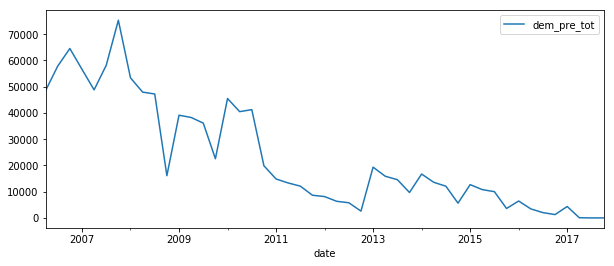

In [29]:
censo_df.groupby(['date'])[['dem_pre_tot']].sum().plot.line()
plt.show()